In [1]:
import numpy as np
import pandas as pd
import concurrent.futures
import time

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
# show more columns and rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv("allCountsWithMetadata.csv")

In [13]:
df = pd.read_csv("shortCanAndGetWithMetadata.csv")

In [14]:
df.edqual.value_counts()

4_graduate     148
5_postgrad     117
3_sixthform    102
2_secondary     54
9_unknown       11
1_primary        2
Name: edqual, dtype: int64

In [15]:
df.replace("1_primary", "1_2_9_prim_secondary_unknown", inplace=True)
df.replace("2_secondary", "1_2_9_prim_secondary_unknown", inplace=True)
df.replace("9_unknown", "1_2_9_prim_secondary_unknown", inplace=True)

In [16]:
df.edqual.value_counts()

4_graduate                      148
5_postgrad                      117
3_sixthform                     102
1_2_9_prim_secondary_unknown     67
Name: edqual, dtype: int64

In [17]:
df.agerange.value_counts()

19_29      141
60_79       68
30_39       68
50_59       56
40_49       49
0_18        35
80_89       11
Unknown      4
90_99        2
Name: agerange, dtype: int64

In [18]:
df.replace("30_39", "30_49", inplace=True)
df.replace("40_49", "30_49", inplace=True)
df.replace("50_59", "50_99", inplace=True)
df.replace("50_59", "50_99", inplace=True)
df.replace("60_79", "50_99", inplace=True)
df.replace("80_89", "50_99", inplace=True)
df.replace("90_99", "50_99", inplace=True)

In [19]:
df.agerange.value_counts()

19_29      141
50_99      137
30_49      117
0_18        35
Unknown      4
Name: agerange, dtype: int64

In [20]:
df.socgrade.value_counts()

E          162
B           98
A           77
C           55
D           30
unknown     12
Name: socgrade, dtype: int64

In [11]:
df.to_csv("allCountsWithMetadataReducedAgerangeAndEdqual.csv", index=False)

In [21]:
df.to_csv("shortCanAndGetReducedMeta.csv", index=False)

In [66]:
test = df.loc[df.andIt.notna()]

In [67]:
test["normAndIt"] = test.andIt / test.w_in_c
test.sort_values(by="normAndIt", axis=0,  inplace=True)

<ipython-input-67-6978388a196c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["normAndIt"] = test.andIt / test.w_in_c
<ipython-input-67-6978388a196c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_values(by="normAndIt", axis=0,  inplace=True)


In [68]:
test["andItBins"] = pd.cut(test.normAndIt, 20, labels=False)

<ipython-input-68-cc5502788600>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["andItBins"] = pd.cut(test.normAndIt, 20, labels=False)


In [46]:
df.youCan.sum()

13671.0

<ipython-input-47-bc7fe682bd98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_values(by="youCan", axis=0,  inplace=True)
<ipython-input-47-bc7fe682bd98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["youCanBins"] = pd.cut(test.youCan, 20, labels=False)


In [50]:
test2 = df.loc[df.youCan.notna()]

In [51]:
test2

,get,take,can,might,iWentTo,llHaveTo,inThe,andIt,toBe,toDo,wouldBe,canYou,llHave,mightBe,youCan,iLl,weLl,itWould,w_in_c,global_modal_freq_speaker,vm_rate,gender,agerange,edqual,socgrade,nat,hab_country,birthcountry,dialect_l1,dialect_l2,dialect_l3,fls,l1,l2
0,10.0,3.0,5.0,4.0,NaN,NaN,9.0,4.0,4.0,3.0,NaN,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2527.0,51.0,2.018,F,30_49,5_postgrad,A,British,UK,UK,unspecified,unspecified,unspecified,no_fls,English,no
1,35.0,4.0,41.0,7.0,2.0,1.0,22.0,18.0,18.0,9.0,7.0,2.0,1.0,NaN,14.0,5.0,2.0,5.0,8008.0,152.0,1.898,F,19_29,5_postgrad,B,British,UK,UK,uk,england,midlands,fls,English,no
2,20.0,2.0,13.0,NaN,1.0,NaN,5.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,2207.0,30.0,1.359,F,19_29,4_graduate,E,British,UK,UK,uk,england,north,no_fls,English,no
3,4.0,3.0,12.0,2.0,NaN,NaN,8.0,2.0,3.0,2.0,1.0,3.0,1.0,NaN,2.0,6.0,NaN,1.0,3131.0,53.0,1.693,M,30_49,5_postgrad,C,British,UK,other,uk,england,north,fls,English,no
5,11.0,4.0,17.0,1.0,1.0,NaN,28.0,4.0,5.0,NaN,8.0,3.0,NaN,1.0,3.0,1.0,2.0,4.0,3583.0,67.0,1.870,M,50_99,3_sixthform,E,British,UK,UK,uk,england,midlands,fls,English,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,104.0,41.0,135.0,20.0,2.0,9.0,62.0,21.0,32.0,21.0,11.0,15.0,16.0,7.0,50.0,39.0,30.0,13.0,36485.0,705.0,1.932,F,50_99,4_graduate,B,British,UK,UK,uk,england,north,no_fls,English,no
657,132.0,15.0,117.0,32.0,1.0,3.0,79.0,38.0,32.0,13.0,6.0,23.0,9.0,6.0,25.0,56.0,6.0,5.0,29673.0,629.0,2.120,M,0_18,1_2_9_prim_secondary_unknown,E,British,UK,UK,uk,england,north,no_fls,English,no
658,43.0,17.0,33.0,13.0,1.0,2.0,47.0,3.0,35.0,5.0,7.0,3.0,11.0,7.0,10.0,14.0,14.0,3.0,13543.0,286.0,2.112,M,50_99,4_graduate,A,British,UK,UK,uk,england,south,no_fls,English,no
659,6.0,3.0,13.0,1.0,NaN,NaN,2.0,NaN,4.0,2.0,1.0,2.0,1.0,1.0,8.0,2.0,2.0,NaN,1780.0,76.0,4.270,F,30_49,3_sixthform,D,British,UK,UK,uk,england,north,no_fls,English,no


In [69]:
test2["normYouCan"] = test2.youCan / test2.w_in_c
test2.sort_values(by="normYouCan", axis=0,  inplace=True)
test2["youCanBins"] = pd.cut(test2.normYouCan, 20, labels=False)

<ipython-input-69-4746e6dd3f2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2["normYouCan"] = test2.youCan / test2.w_in_c
<ipython-input-69-4746e6dd3f2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.sort_values(by="normYouCan", axis=0,  inplace=True)
<ipython-input-69-4746e6dd3f2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [70]:
test2

,get,take,can,might,iWentTo,llHaveTo,inThe,andIt,toBe,toDo,wouldBe,canYou,llHave,mightBe,youCan,iLl,weLl,itWould,w_in_c,global_modal_freq_speaker,vm_rate,gender,agerange,edqual,socgrade,nat,hab_country,birthcountry,dialect_l1,dialect_l2,dialect_l3,fls,l1,l2,youCanBins,normYouCan
299,10.0,5.0,12.0,NaN,2.0,1.0,24.0,12.0,2.0,6.0,3.0,2.0,4.0,NaN,1.0,11.0,3.0,2.0,7293.0,105.0,1.440,M,50_99,5_postgrad,E,British,UK,UK,uk,england,north,fls,English,no,0,0.000137
551,50.0,14.0,26.0,12.0,1.0,NaN,28.0,6.0,2.0,22.0,3.0,1.0,2.0,6.0,2.0,17.0,4.0,2.0,11919.0,171.0,1.435,M,0_18,1_2_9_prim_secondary_unknown,E,British,UK,UK,uk,england,midlands,no_fls,English,no,0,0.000168
501,17.0,2.0,9.0,2.0,NaN,NaN,11.0,8.0,6.0,7.0,1.0,NaN,NaN,NaN,1.0,4.0,1.0,1.0,5352.0,65.0,1.214,F,30_49,4_graduate,B,British,UK,UK,unspecified,unspecified,unspecified,fls,English,yes,0,0.000187
213,27.0,4.0,10.0,5.0,1.0,2.0,4.0,2.0,3.0,3.0,1.0,1.0,3.0,2.0,1.0,8.0,NaN,NaN,5347.0,66.0,1.234,M,19_29,5_postgrad,E,British,UK,UK,uk,england,north,no_fls,English,no,0,0.000187
348,15.0,3.0,10.0,2.0,4.0,NaN,14.0,11.0,4.0,10.0,6.0,NaN,NaN,2.0,1.0,5.0,NaN,2.0,4602.0,84.0,1.825,F,50_99,4_graduate,E,British,other,other,uk,england,unspecified,no_fls,English,no,0,0.000217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,4.0,NaN,14.0,NaN,NaN,NaN,4.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,8.0,1.0,1.0,NaN,1393.0,31.0,0.020,M,30_49,5_postgrad,B,other,UK,UK,uk,england,north,fls,English,yes,13,0.005743
118,4.0,1.0,6.0,2.0,3.0,NaN,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,6.0,NaN,NaN,NaN,929.0,18.0,1.938,M,19_29,3_sixthform,C,British,UK,UK,uk,england,north,no_fls,English,no,14,0.006459
621,3.0,1.0,5.0,2.0,NaN,NaN,2.0,1.0,1.0,7.0,1.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,765.0,29.0,3.791,F,30_49,4_graduate,B,British,UK,UK,uk,england,south,no_fls,English,no,14,0.006536
434,7.0,NaN,11.0,4.0,NaN,NaN,2.0,2.0,NaN,2.0,1.0,2.0,2.0,1.0,8.0,7.0,NaN,NaN,1001.0,36.0,3.596,F,30_49,4_graduate,E,British,UK,UK,uk,england,south,fls,English,no,18,0.007992


In [73]:
test2.youCanBins.value_counts()

1     147
2     144
0      95
3      77
4      46
5      29
7      13
6      12
10      7
8       5
9       4
11      2
14      2
13      1
18      1
19      1
Name: youCanBins, dtype: int64

In [98]:
x = test2.sort_values(by="normYouCan", ignore_index=True).normYouCan
y = test2.reset_index().index
plt.plot(x, y)

In [103]:
x2 = df.loc[df.iLl.notna()].iLl / df.loc[df.iLl.notna()].w_in_c

In [104]:
x2 = x2.sort_values().reset_index(drop=True)
y2 = x2.index

In [108]:
x3 = df.loc[df.itWould.notna()].itWould / df.loc[df.itWould.notna()].w_in_c
x3 = x3.sort_values().reset_index(drop=True)
y3 = x3.index

In [111]:
x4 = df.loc[df.weLl.notna()].weLl / df.loc[df.weLl.notna()].w_in_c
x4 = x4.sort_values().reset_index(drop=True)
y4 = x4.index

In [ ]:
in the and it to be to do

In [113]:
x5 = df.loc[df.inThe.notna()].inThe / df.loc[df.inThe.notna()].w_in_c
x5 = x5.sort_values().reset_index(drop=True)
y5 = x5.index

x6 = df.loc[df.andIt.notna()].andIt / df.loc[df.andIt.notna()].w_in_c
x6 = x6.sort_values().reset_index(drop=True)
y6 = x6.index

x7 = df.loc[df.toBe.notna()].toBe / df.loc[df.toBe.notna()].w_in_c
x7 = x7.sort_values().reset_index(drop=True)
y7 = x7.index

x8 = df.loc[df.toDo.notna()].toDo / df.loc[df.toDo.notna()].w_in_c
x8 = x8.sort_values().reset_index(drop=True)
y8 = x8.index

<IPython.core.display.Javascript object>


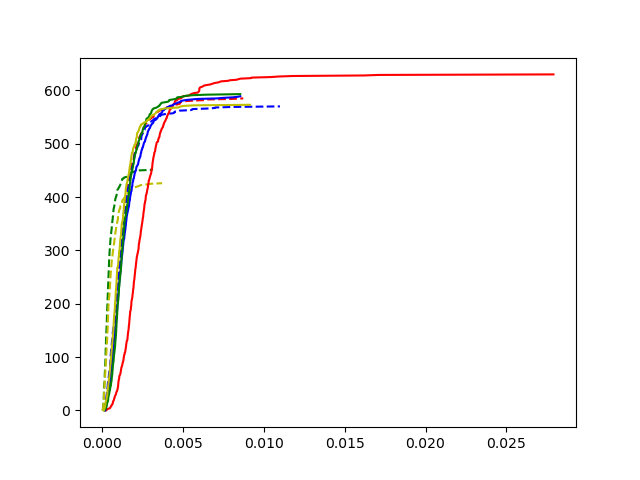

In [117]:
plt.plot(x, y, 'r--', x2, y2, 'b--', x3, y3, 'g--', x4, y4, 'y--', x5, y5, 'r-', x6, y6, 'b-', x7, y7, 'g-', x8, y8, 'y-')

In [118]:
test2

,get,take,can,might,iWentTo,llHaveTo,inThe,andIt,toBe,toDo,wouldBe,canYou,llHave,mightBe,youCan,iLl,weLl,itWould,w_in_c,global_modal_freq_speaker,vm_rate,gender,agerange,edqual,socgrade,nat,hab_country,birthcountry,dialect_l1,dialect_l2,dialect_l3,fls,l1,l2,youCanBins,normYouCan
299,10.0,5.0,12.0,NaN,2.0,1.0,24.0,12.0,2.0,6.0,3.0,2.0,4.0,NaN,1.0,11.0,3.0,2.0,7293.0,105.0,1.440,M,50_99,5_postgrad,E,British,UK,UK,uk,england,north,fls,English,no,0,0.000137
551,50.0,14.0,26.0,12.0,1.0,NaN,28.0,6.0,2.0,22.0,3.0,1.0,2.0,6.0,2.0,17.0,4.0,2.0,11919.0,171.0,1.435,M,0_18,1_2_9_prim_secondary_unknown,E,British,UK,UK,uk,england,midlands,no_fls,English,no,0,0.000168
501,17.0,2.0,9.0,2.0,NaN,NaN,11.0,8.0,6.0,7.0,1.0,NaN,NaN,NaN,1.0,4.0,1.0,1.0,5352.0,65.0,1.214,F,30_49,4_graduate,B,British,UK,UK,unspecified,unspecified,unspecified,fls,English,yes,0,0.000187
213,27.0,4.0,10.0,5.0,1.0,2.0,4.0,2.0,3.0,3.0,1.0,1.0,3.0,2.0,1.0,8.0,NaN,NaN,5347.0,66.0,1.234,M,19_29,5_postgrad,E,British,UK,UK,uk,england,north,no_fls,English,no,0,0.000187
348,15.0,3.0,10.0,2.0,4.0,NaN,14.0,11.0,4.0,10.0,6.0,NaN,NaN,2.0,1.0,5.0,NaN,2.0,4602.0,84.0,1.825,F,50_99,4_graduate,E,British,other,other,uk,england,unspecified,no_fls,English,no,0,0.000217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,4.0,NaN,14.0,NaN,NaN,NaN,4.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,8.0,1.0,1.0,NaN,1393.0,31.0,0.020,M,30_49,5_postgrad,B,other,UK,UK,uk,england,north,fls,English,yes,13,0.005743
118,4.0,1.0,6.0,2.0,3.0,NaN,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,6.0,NaN,NaN,NaN,929.0,18.0,1.938,M,19_29,3_sixthform,C,British,UK,UK,uk,england,north,no_fls,English,no,14,0.006459
621,3.0,1.0,5.0,2.0,NaN,NaN,2.0,1.0,1.0,7.0,1.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,765.0,29.0,3.791,F,30_49,4_graduate,B,British,UK,UK,uk,england,south,no_fls,English,no,14,0.006536
434,7.0,NaN,11.0,4.0,NaN,NaN,2.0,2.0,NaN,2.0,1.0,2.0,2.0,1.0,8.0,7.0,NaN,NaN,1001.0,36.0,3.596,F,30_49,4_graduate,E,British,UK,UK,uk,england,south,fls,English,no,18,0.007992


In [137]:
test2.groupby(test2.youCanBins).agg(['mean', 'var'])

get                     take                      can  \
                  mean           var       mean          var        mean   
youCanBins                                                                 
0            29.852632   1496.892945   7.333333   157.460674   21.547368   
1            82.958904  21141.239679  20.718519  1392.472416   67.394558   
2            91.769231  23494.756230  21.977941  1443.592102   81.312500   
3            88.881579  42173.732456  24.246377  3992.600171   85.779221   
4            37.818182   3727.408034  10.250000   173.050000   40.847826   
5            56.259259  15696.737892  12.545455   588.164502   45.482759   
6           105.636364  36670.054545  42.142857  3082.142857  104.916667   
7           109.538462  25973.602564  35.000000  2908.000000  156.307692   
8            11.400000    104.300000        NaN          NaN    9.200000   
9            41.500000   1982.333333  10.500000   142.333333   50.000000   
10           12.857143     77.142857   5.600000    24.300000   20.142857   
11           12.000000     98.000000   5.000000     8.000000   24.000000   
13            4.000000           NaN        NaN          NaN   14.000000   
14            3.500000      0.500000   1.000000     0.000000    5.500000   
18            7.000000           NaN        NaN          NaN   11.000000   
19            3.000000           NaN        NaN          NaN    8.000000   

                              might                 iWentTo              \
                     var       mean          var       mean         var   
youCanBins                                                                
0             855.718477   7.977011    94.813419   2.469388    6.212585   
1           13351.445998  24.175573  2244.945860   5.246753   66.398838   
2           15889.922640  24.066667  1425.689552   4.141176   22.813165   
3           41926.069036  24.357143  2447.015528   4.181818   42.384778   
4            3651.731884  11.076923   368.283401   2.000000    2.125000   
5            6379.472906  14.105263   266.988304   2.153846    3.474359   
6           32598.265152  23.600000  1516.711111  15.666667  357.333333   
7           59990.397436  33.363636  2194.254545   3.250000    8.500000   
8              29.700000   5.500000    40.500000   1.000000         NaN   
9            2459.333333   7.666667    36.333333   1.000000    0.000000   
10            185.476190   4.400000     7.300000   1.000000         NaN   
11              2.000000   6.000000          NaN   1.000000         NaN   
13                   NaN        NaN          NaN        NaN         NaN   
14              0.500000   2.000000     0.000000   3.000000         NaN   
18                   NaN   4.000000          NaN        NaN         NaN   
19                   NaN   6.000000          NaN        NaN         NaN   

             llHaveTo                  inThe                    andIt  \
                 mean         var       mean           var       mean   
youCanBins                                                              
0            2.477273    5.650634  22.231579   1180.669205  12.413043   
1            4.686747   44.607993  54.452055   9847.242513  31.884892   
2            6.462500  150.454272  56.468085   8140.865046  33.348148   
3            5.432432   69.585586  58.276316  14434.335965  33.418919   
4            3.400000   29.200000  21.022222    852.204040  14.878049   
5            5.090909   38.690909  31.740741   5895.968661  19.814815   
6            4.750000   18.916667  98.222222  27821.194444  65.000000   
7           11.000000  219.500000  82.692308  15604.730769  28.083333   
8                 NaN         NaN   2.250000      0.916667   3.200000   
9                 NaN         NaN  16.250000    156.916667   9.750000   
10           1.000000         NaN   6.571429     12.285714   3.500000   
11                NaN         NaN  13.500000    180.500000   8.500000   
13                NaN         NaN   4.000000         

In [138]:
test3 = test2.groupby(test2.youCanBins).agg(['mean', 'var']).normYouCan

In [147]:
x = test3["mean"]
y = test3["var"]

In [148]:
y

youCanBins
0     1.183928e-08
1     1.285145e-08
2     1.443126e-08
3     1.607772e-08
4     1.403212e-08
5     1.641399e-08
6     1.217577e-08
7     1.600396e-08
8     1.519370e-08
9     3.298270e-08
10    2.677691e-08
11    2.191075e-08
13             NaN
14    2.994616e-09
18             NaN
19             NaN
Name: var, dtype: float64

<IPython.core.display.Javascript object>


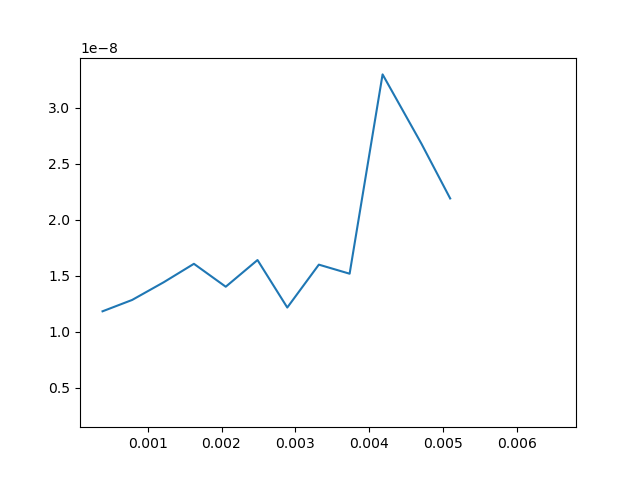

In [150]:
plt.plot(x, y)

In [152]:
canDf = df.loc[df.can.notna()]
canDf["normCan"] = canDf.can / canDf.w_in_c
canDf.sort_values(by="normCan", axis=0,  inplace=True)
canDf["canBins"] = pd.cut(canDf.normCan, 20, labels=False)
canDf2 = canDf.groupby(canDf.canBins).agg(['mean', 'var']).normCan

<ipython-input-152-a220e82000d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canDf["normCan"] = canDf.can / canDf.w_in_c
<ipython-input-152-a220e82000d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canDf.sort_values(by="normCan", axis=0,  inplace=True)
<ipython-input-152-a220e82000d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [154]:
x = canDf2['mean']
y = canDf2['var']

In [157]:
canDf2

,mean,var
canBins,,
0,0.000602,2.959664e-08
1,0.001153,2.255732e-08
2,0.001714,2.567866e-08
3,0.002260,2.904437e-08
4,0.002805,2.194378e-08
5,0.003339,2.544124e-08
6,0.003882,2.442857e-08
7,0.004448,2.333850e-08
8,0.004965,2.798675e-08


<IPython.core.display.Javascript object>


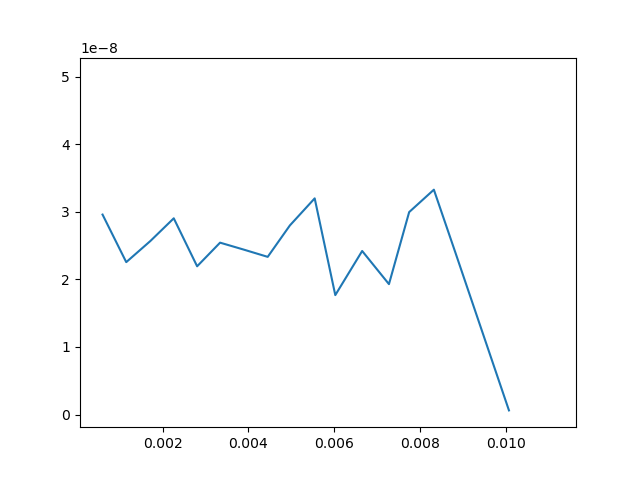

In [155]:
plt.plot(x, y)